# Performance test between GPU and CPU

**by:** Erik Hallström

In [1]:
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time

def get_times(maximum_time):

    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = range(500,50000,50)

    for size in matrix_sizes:
        for device_name in device_times.keys():
            print("\n############## Calculating on the " + device_name + " ##############")

            shape = (size,size)
            print("Size shape: ", size, " x ", size )
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)


            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    #print(result)
                    device_times[device_name].append(time_taken)

            #print(device_times)
            if time_taken > maximum_time:
                return device_times, matrix_sizes

In [2]:
%%time

device_times, matrix_sizes = get_times(30)
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]


############## Calculating on the /gpu:0 ##############
Size shape:  500  x  500

############## Calculating on the /cpu:0 ##############
Size shape:  500  x  500

############## Calculating on the /gpu:0 ##############
Size shape:  550  x  550

############## Calculating on the /cpu:0 ##############
Size shape:  550  x  550

############## Calculating on the /gpu:0 ##############
Size shape:  600  x  600

############## Calculating on the /cpu:0 ##############
Size shape:  600  x  600

############## Calculating on the /gpu:0 ##############
Size shape:  650  x  650

############## Calculating on the /cpu:0 ##############
Size shape:  650  x  650

############## Calculating on the /gpu:0 ##############
Size shape:  700  x  700

############## Calculating on the /cpu:0 ##############
Size shape:  700  x  700

############## Calculating on the /gpu:0 ##############
Size shape:  750  x  750

############## Calculating on the /cpu:0 ##############
Size shape:  750  x  750

############## 

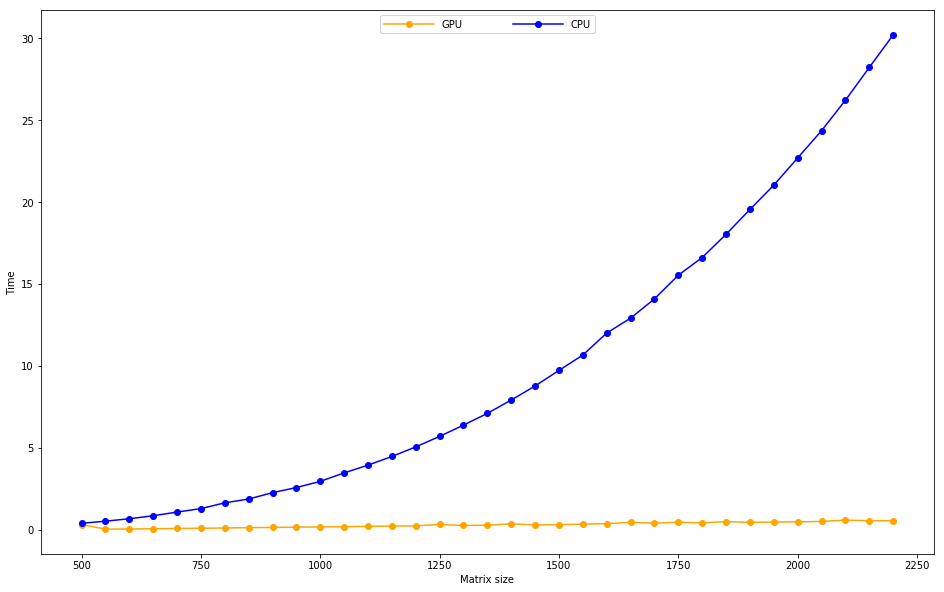

In [3]:
plt.figure(figsize=(16,10))
plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'o-', color='orange', label='GPU')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-', color='blue', label='CPU')

plt.legend(loc='upper center', ncol=2, handlelength=5, columnspacing=5.0)

plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()

In [4]:
print("\nGPU times {}".format(gpu_times))
print("\nCPU times {}".format(cpu_times))
print("\nMean time difference {}".format((sum(cpu_times) - sum(gpu_times))/len(gpu_times)))


GPU times [0.3001277446746826, 0.026002883911132812, 0.031248092651367188, 0.046874284744262695, 0.0625002384185791, 0.07812738418579102, 0.0937504768371582, 0.11590838432312012, 0.12522125244140625, 0.14341354370117188, 0.15623807907104492, 0.17186617851257324, 0.19274258613586426, 0.2091822624206543, 0.22377991676330566, 0.30672717094421387, 0.2472386360168457, 0.26527953147888184, 0.3440074920654297, 0.2789480686187744, 0.2965126037597656, 0.3288247585296631, 0.35979676246643066, 0.4354512691497803, 0.38721728324890137, 0.44271373748779297, 0.40540409088134766, 0.4839496612548828, 0.4369626045227051, 0.45273804664611816, 0.46720242500305176, 0.4926469326019287, 0.5780789852142334, 0.5301768779754639, 0.5441286563873291]

CPU times [0.3789999485015869, 0.5086026191711426, 0.6569764614105225, 0.8415825366973877, 1.0650417804718018, 1.2758381366729736, 1.6294476985931396, 1.861790657043457, 2.2506518363952637, 2.563358783721924, 2.93863582611084, 3.458820104598999, 3.9304423332214355,

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_plots = 20

plt.figure(figsize=(16,8))

colormap = plt.cm.gist_ncar
plt.gca().set_prop_cycle('color', [colormap(i) for i in np.linspace(0, 0.9, num_plots)])

x = np.arange(10)
labels = []
for i in range(1, num_plots + 1):
    plt.plot(x, i * x + 5 * i)
    labels.append(r'$y = %ix + %i$' % (i, 5*i))

plt.legend(labels, ncol=4, loc='upper center', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=2.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)

plt.show()